# Notebook Iteracion 2 Modelado

### Objetivo:
Realizar un tratamiento completo a los datos de entrenamiento y ejecutar de nuevo el modelo línea base para observar mejorías en las métricas:
- Análisis de distribucion y atípicos sobre la variables predictoras
- Análisis de correlaciones variable precio vs variables predictoras
- Análisis de correlaciones entre variables predictoras
- Nueva ejecución del modelo línea base 

In [1]:
# Funciones generales
import sys
sys.path.append('../')
# A medida que avanzan las iteraciones se crearan mas funcinoes transversales
from funciones import *

**Lectura de datos**
Se leen los datos resultantes de la iteración 1 aprovechando el tratamiento realizado a estos datos

In [2]:
import os 
# get current directory
path = os.getcwd()
# parent directory
path = os.path.abspath("../")
data_model = pd.read_csv(path + "/iteracion_1/datos_iteracion_1.csv")
data_model.head()

,precio,zona,barrio_sector,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,1100000.0,centro,castilla,1.0,95.0,1.0,0.0,3.0,0.0,95.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
1,950000.0,centro,el salvador,1.0,70.0,1.0,0.0,2.0,3.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
2,970000.0,centro,los angeles,1.0,38.0,1.0,0.0,1.0,4.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
3,1400000.0,centro,prado,1.0,50.0,1.0,1.0,2.0,0.0,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
4,800000.0,centro,12 de octubre,1.0,92.0,1.0,0.0,3.0,2.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709


**Distribución de variable precios**

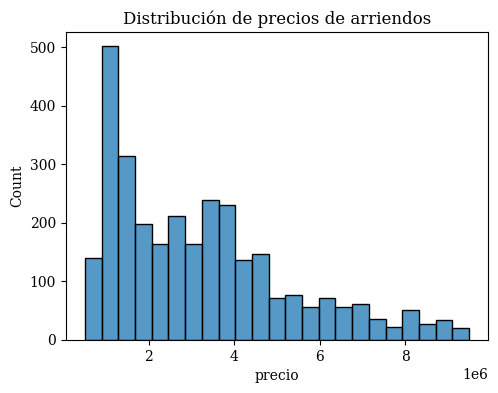

In [3]:
graficar_distribucion_histograma(data_model, 'precio')

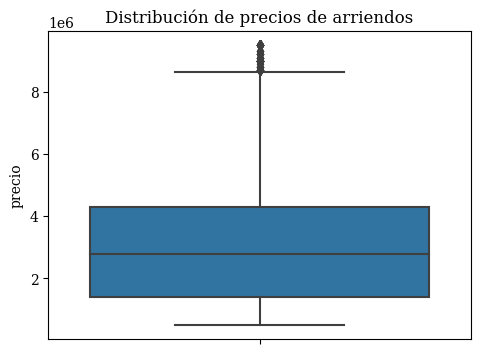

In [4]:
graficar_distribucion_boxplot(data_model, 'precio')

Dimensiones de la base

In [5]:
imprimir_dimensiones(data_model)

Numero de muestras: 3020, Número de columnas: 39


**Separación de las variables**

Las variables obtenidas por el proceso de scraping se dividen en tres tipos que es importante separar para hacer un analisis mas detallado, estas son:
- Variables categóricas: Variables booleana que indican si un inmueble cuenta con una característica
- Variables categoricas numéricas: Variables discretas numéricas
- Variables numéricas: Variables continuas

In [6]:
# Variables preductoras generales
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]

# Variables categóricas
cat_features = ['juegos_infantiles','balcon','zona_ropas','camaras_cctv','cancha_polideportiva',
                'ascensor','cancha_squash','zona_bbq','patio','unidad_cerrada_conjunto',
                'zonas_verdes',
                'aire_acondicionado','jacuzzi','red_de_Gas','turco','porteria_24_7','sauna',
                'calentador_de_agua','terraza','closet_de_linos','biblioteca',
                'parqueadero_visitantes',
                'gimnasio','piscina','salon_social','dispositivos_automatizacion','alarma']

# Variables categíricas numéricas
cat_number_fetures = ['baños_familiares', 'numero_niveles', 'parqueaderos', 'alcobas_familiares', 'estrato']

# Variables numéricas
num_features = ['area_bruta', 'area_total','tipo_cocina_freq','tipo_pisos_freq']

**Distribución de los datos**:

se procede a realizar un análisis de distribución de los datos para observar su comportamiento y posibles tendencias en su influencia sobre el modelo

**Vriables numéricas**

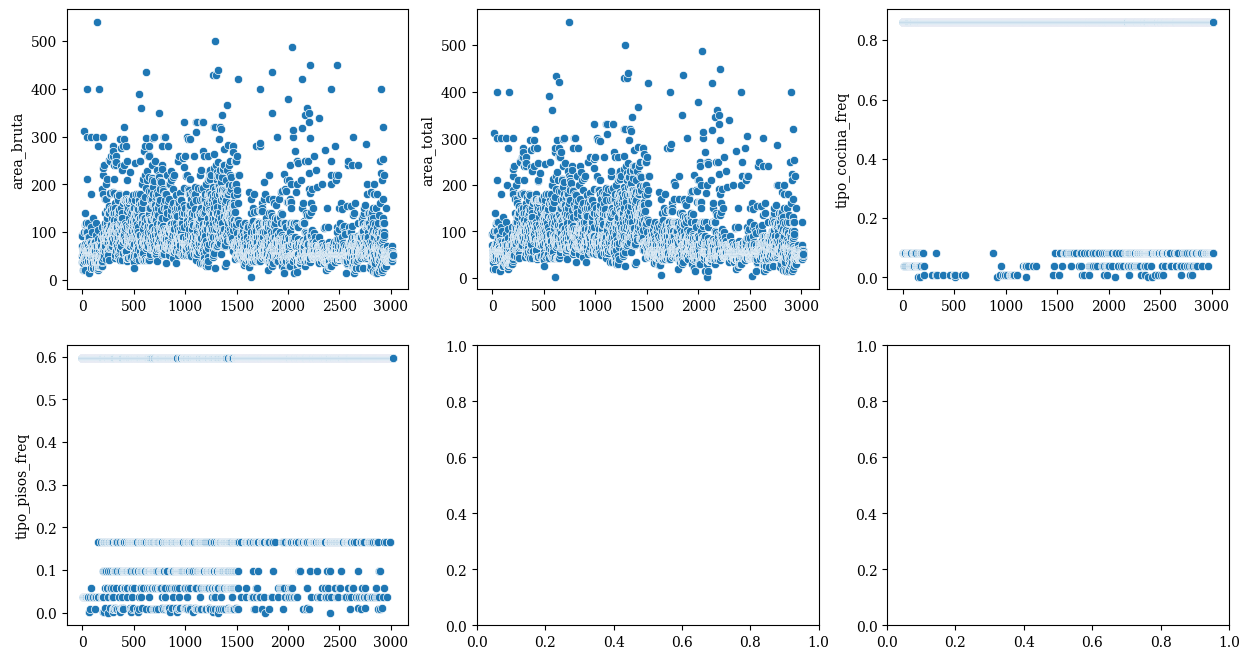

In [7]:
graficar_distribcion_vv(data_model, num_features, "dist")

En las gráficas de distribuciones de las variables numéricas no se observa comportamientos artípicos, recordando que las nuevas variables numéricas tipo_pisos_freq y tipo_cocina_freq son el resultado de aplicar encoding por frecuencias sobre las variables categóricas tipo_pisos y tipo_cocina respectivamente, donde allí se observaba una predominancia de una de las categorías sobre las demás, lo cual se traduce en el comporamiento observado de una gran cantidad de datos concentrados en una de las frecuencias. La intervencion a estas dos variables se completará con el análisis de correlaciones

**Variables categóricas numéricas**

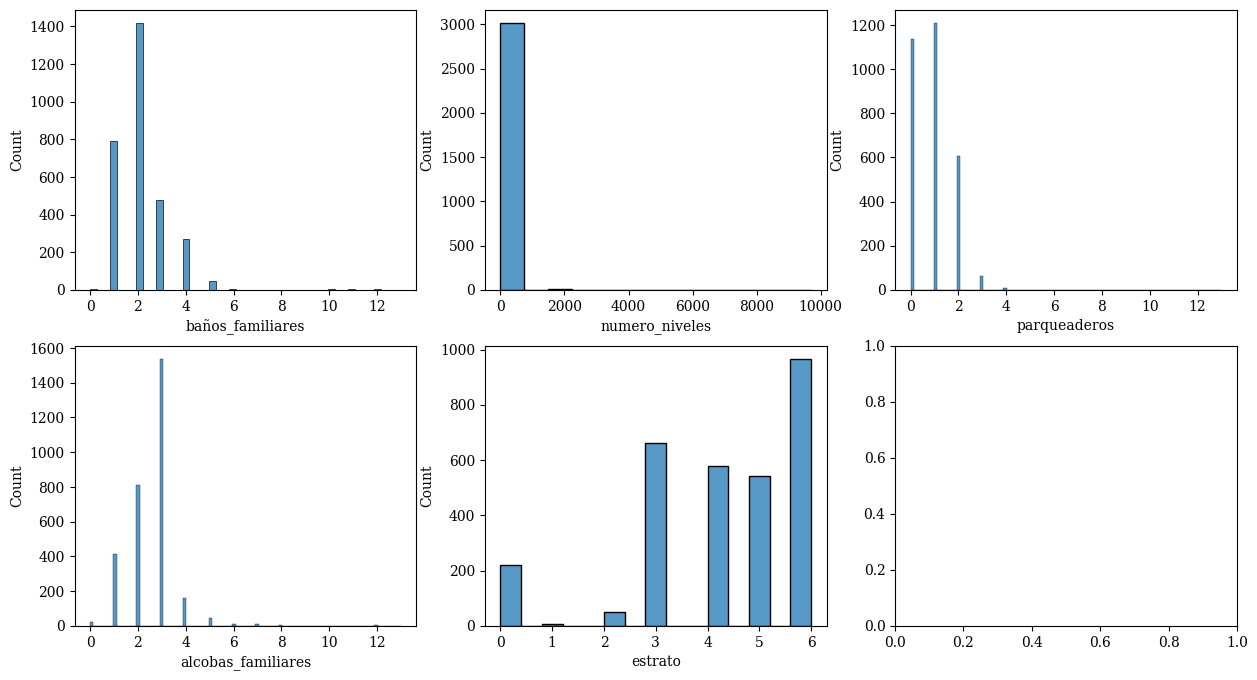

In [8]:
graficar_distribcion_vv(data_model, cat_number_fetures)

En las distrubuciones de las variables categóricas numéricas se puede observar algunos comportamientos atípicos considerando que la cobertura sobre este proyecto es de arriendo de viviendas. Estos datos son por ejemplo:
- Valores de la variable numero_niveles en miles y menores a 1
- Valores en numero_parqueadresos superiores a 5
- Valores de alcobas_familiares superiores a 4 

Para observar estos comportamientos atípicos se calcula el porcentaje de información que representa cada categoría en cada variable para así realizar intervenciones

In [9]:
for cat in cat_number_fetures:
    print((data_model.groupby(cat).size()/data_model.shape[0])*100)
    print('\n')

baños_familiares
0.0      0.165563
1.0     26.225166
2.0     46.920530
3.0     15.761589
4.0      8.973510
5.0      1.556291
6.0      0.132450
7.0      0.033113
10.0     0.066225
11.0     0.066225
12.0     0.066225
13.0     0.033113
dtype: float64


numero_niveles
0.0        0.033113
1.0       92.814570
2.0        3.708609
3.0        0.927152
4.0        0.397351
5.0        0.165563
6.0        0.099338
7.0        0.198675
8.0        0.132450
9.0        0.099338
11.0       0.066225
12.0       0.066225
13.0       0.066225
14.0       0.033113
15.0       0.099338
16.0       0.066225
18.0       0.033113
19.0       0.066225
20.0       0.066225
21.0       0.033113
22.0       0.066225
23.0       0.033113
24.0       0.066225
25.0       0.033113
26.0       0.033113
141.0      0.033113
201.0      0.033113
301.0      0.033113
302.0      0.066225
402.0      0.033113
404.0      0.033113
447.0      0.033113
501.0      0.033113
710.0      0.033113
805.0      0.033113
1011.0     0.033113
1706.0     0.03

Se observa que las categorías atípicas no representan, en la mayoría de las ocaciones, ni un 1% de los datos, por tanto se eliminarán estas categorías que indican valores ilógicos en estas variables. Los limites elegidos para estos valores se eligen de acuerdo a criterio del desarrollador y el negocio

In [10]:
data_model_no_out = data_model[(data_model['numero_niveles'] > 0) & (data_model['numero_niveles'] <= 3)]
data_model_no_out = data_model_no_out[data_model_no_out['baños_familiares'] <= 5]
data_model_no_out = data_model_no_out[data_model_no_out['parqueaderos'] <= 3]
data_model_no_out = data_model_no_out[data_model_no_out['alcobas_familiares'] <= 5]
data_model_no_out = data_model_no_out[data_model_no_out['alcobas_familiares'] <= 5]
imprimir_dimensiones(data_model_no_out)

Numero de muestras: 2892, Número de columnas: 39


Con la eliminacion de los datos atípicos se observa la nueva distribución de las variables categóricas numéricas


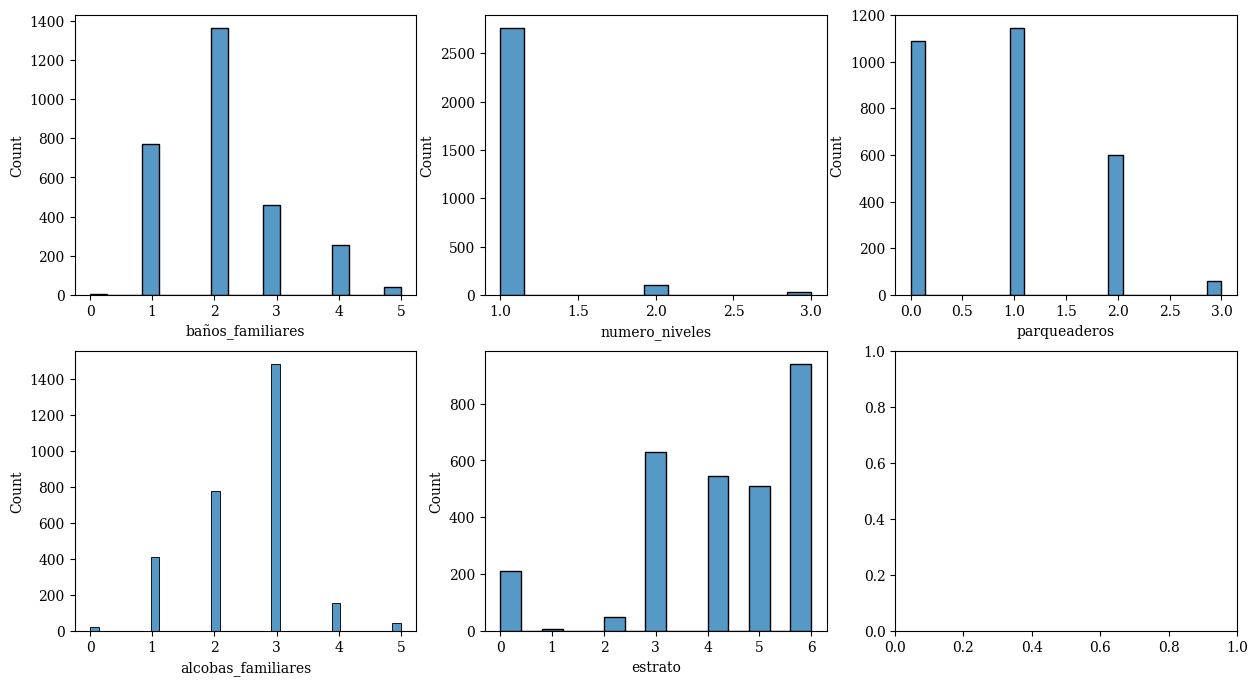

In [12]:
graficar_distribcion_vv(data_model_no_out, cat_number_fetures)

**Variables categóricas numéricas**

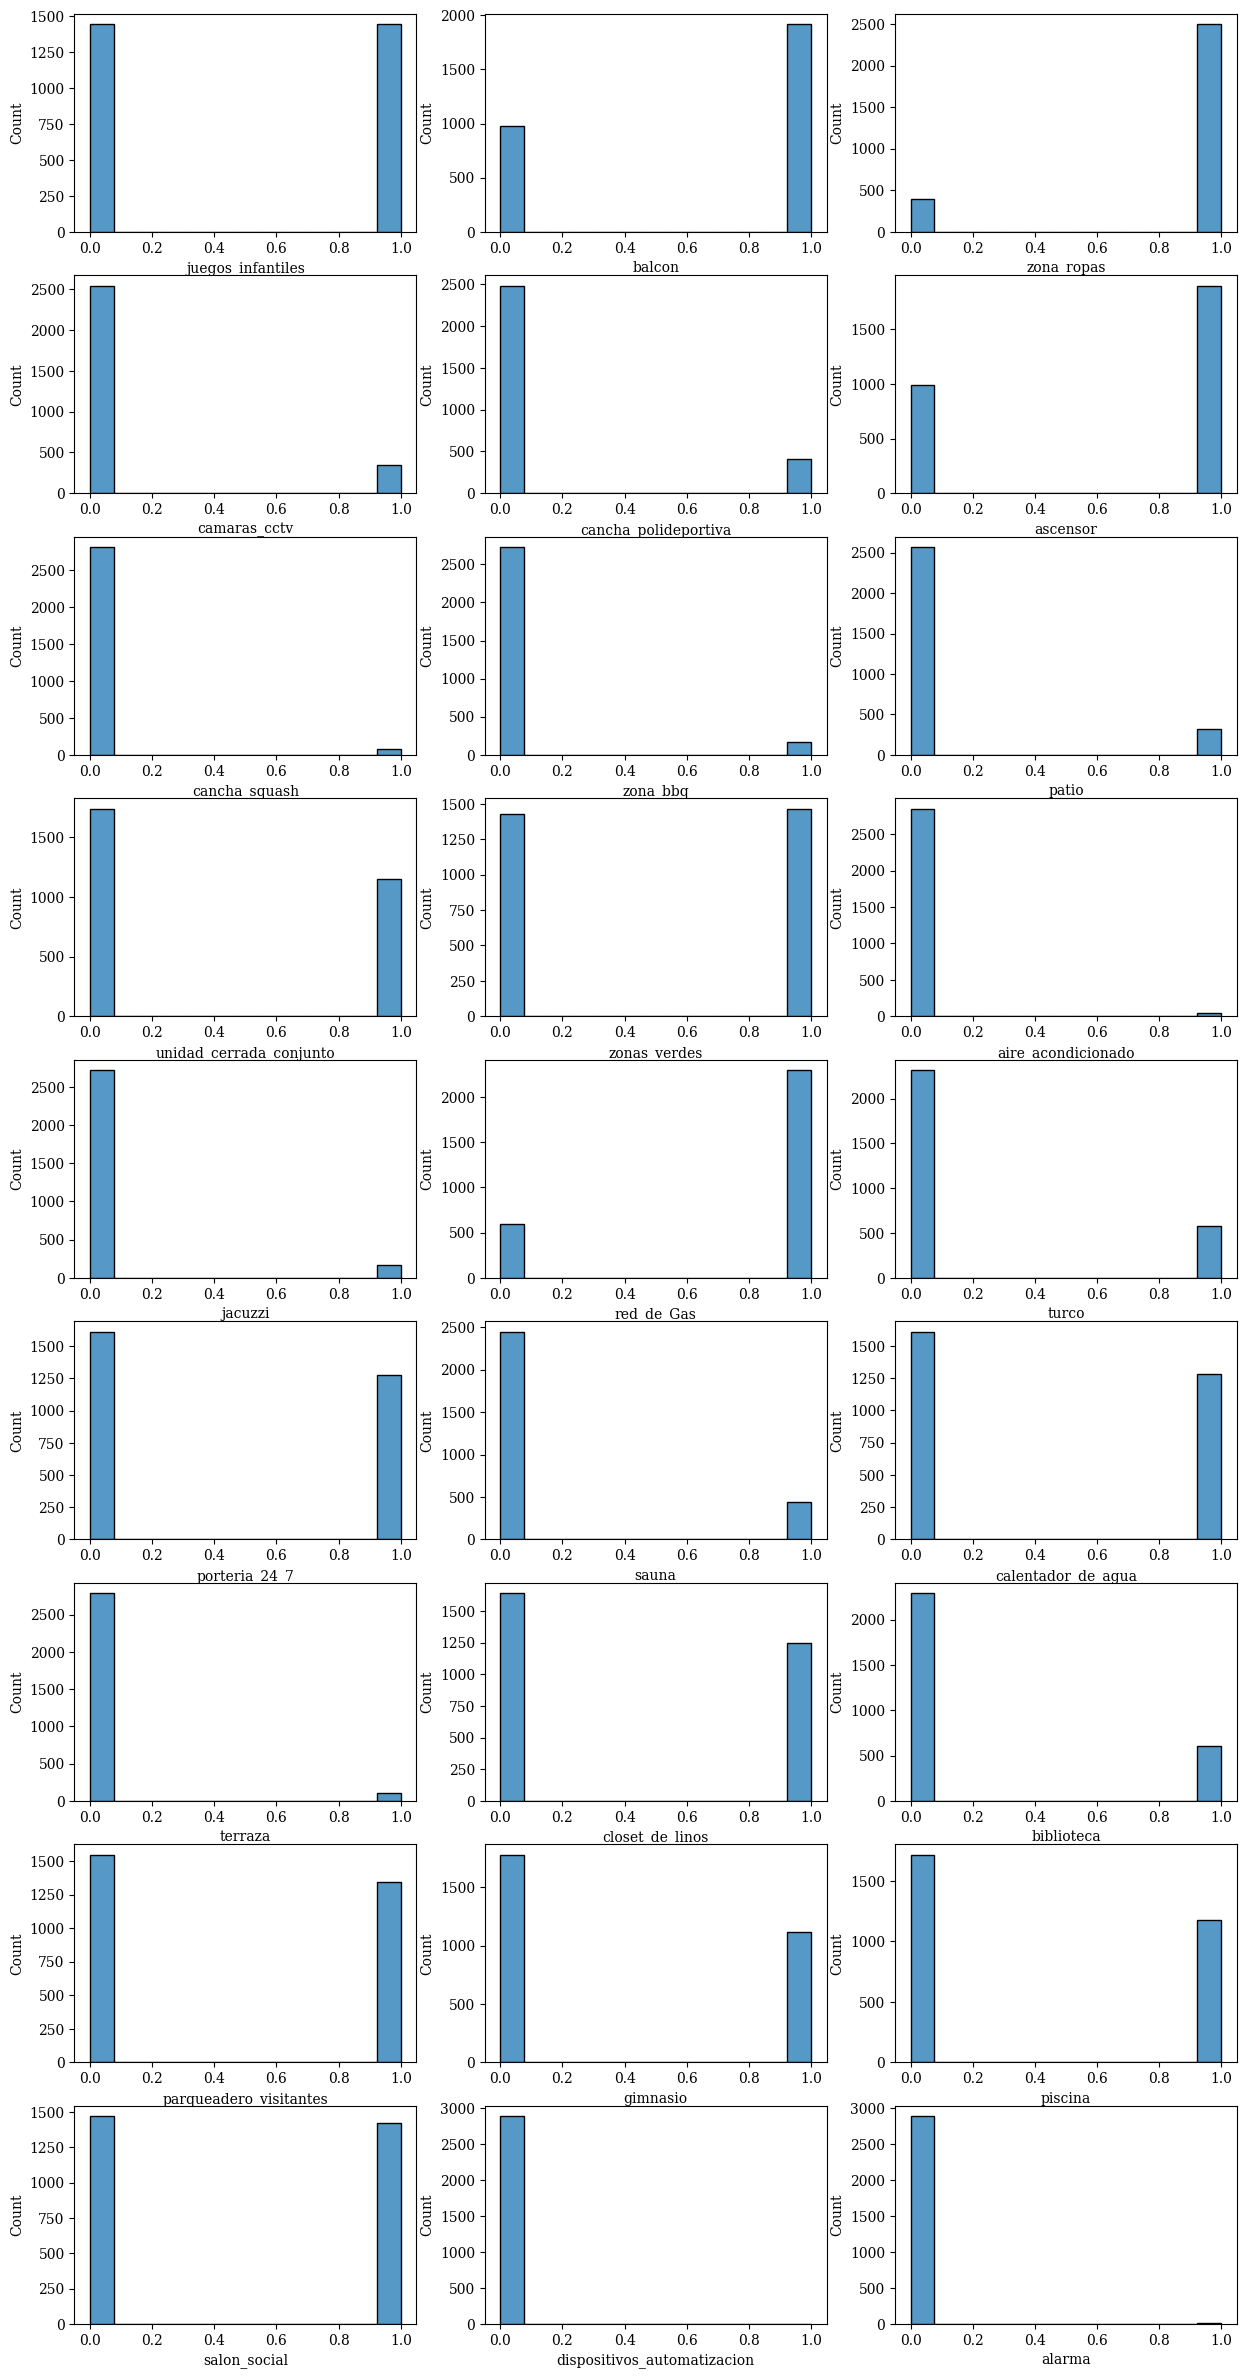

In [13]:
graficar_distribcion_vv(data_model_no_out, cat_features, fig_zise=(15,30), num_rows=9)

En las variables categóricas tenemos valores booleanos que representan si una vivienda cuenta con una caraterística o no, aquí es importante resaltar que si la mayoría de las vivientas cuentan con una característica esta variable tomará el valor de 1 en un porcentaje muy superior a 0, lo cual indica que esta no tendra ninguna afectación en el modelo por su falta de variablilidad

Esto se complementa calculando el porcentaje de datos que representa cada categoría

In [14]:
for cat in cat_features:
    print((data_model_no_out.groupby(cat).size()/data_model_no_out.shape[0])*100)
    print('\n')

juegos_infantiles
0.0    50.0
1.0    50.0
dtype: float64


balcon
0.0    33.713693
1.0    66.286307
dtype: float64


zona_ropas
0.0    13.658368
1.0    86.341632
dtype: float64


camaras_cctv
0.0    87.863071
1.0    12.136929
dtype: float64


cancha_polideportiva
0.0    85.753804
1.0    14.246196
dtype: float64


ascensor
0.0    34.3361
1.0    65.6639
dtype: float64


cancha_squash
0.0    97.164592
1.0     2.835408
dtype: float64


zona_bbq
0.0    94.22545
1.0     5.77455
dtype: float64


patio
0.0    88.762102
1.0    11.237898
dtype: float64


unidad_cerrada_conjunto
0.0    60.200553
1.0    39.799447
dtype: float64


zonas_verdes
0.0    49.343015
1.0    50.656985
dtype: float64


aire_acondicionado
0.0    98.478562
1.0     1.521438
dtype: float64


jacuzzi
0.0    93.983402
1.0     6.016598
dtype: float64


red_de_Gas
0.0    20.71231
1.0    79.28769
dtype: float64


turco
0.0    80.082988
1.0    19.917012
dtype: float64


porteria_24_7
0.0    55.739972
1.0    44.260028
dtype: float64



Se observa que variables como _cancha_squash_, _zona_bbq_ o _patio_, cuentan con un sesgo muy grande entre categorías, lo cual puede implicar que no sean influyentes en el modelo. Sin embargo, la eliminación de variables con este comportamiento se determinará completando este analisis con correlaciones

**Correlación**

El analisis de correlación se procede mediante las siguientes ejecuciones:
- Método spearman para el cálculo de correlaciones
- Estandarización de las variables predictoras

In [15]:
# Separación de las variables predictoras y la variable respuesta
X = data_model_no_out[pred_columns]
Y = data_model_no_out['precio']

In [16]:
X_est = estandarizar(X)

**Correlacion variables predictoras vs variable objetivo:**

Se realiza el cálculo de la correlacion de spearman de cada una de las variables predictoras vs la variable objetivo, este valor de correlacion se calcula de manera absoluta donde se establece como límite _0.2_ (criterio experto) para determinar si una variable puede ser influyente sobre la variable objetivo _precio_

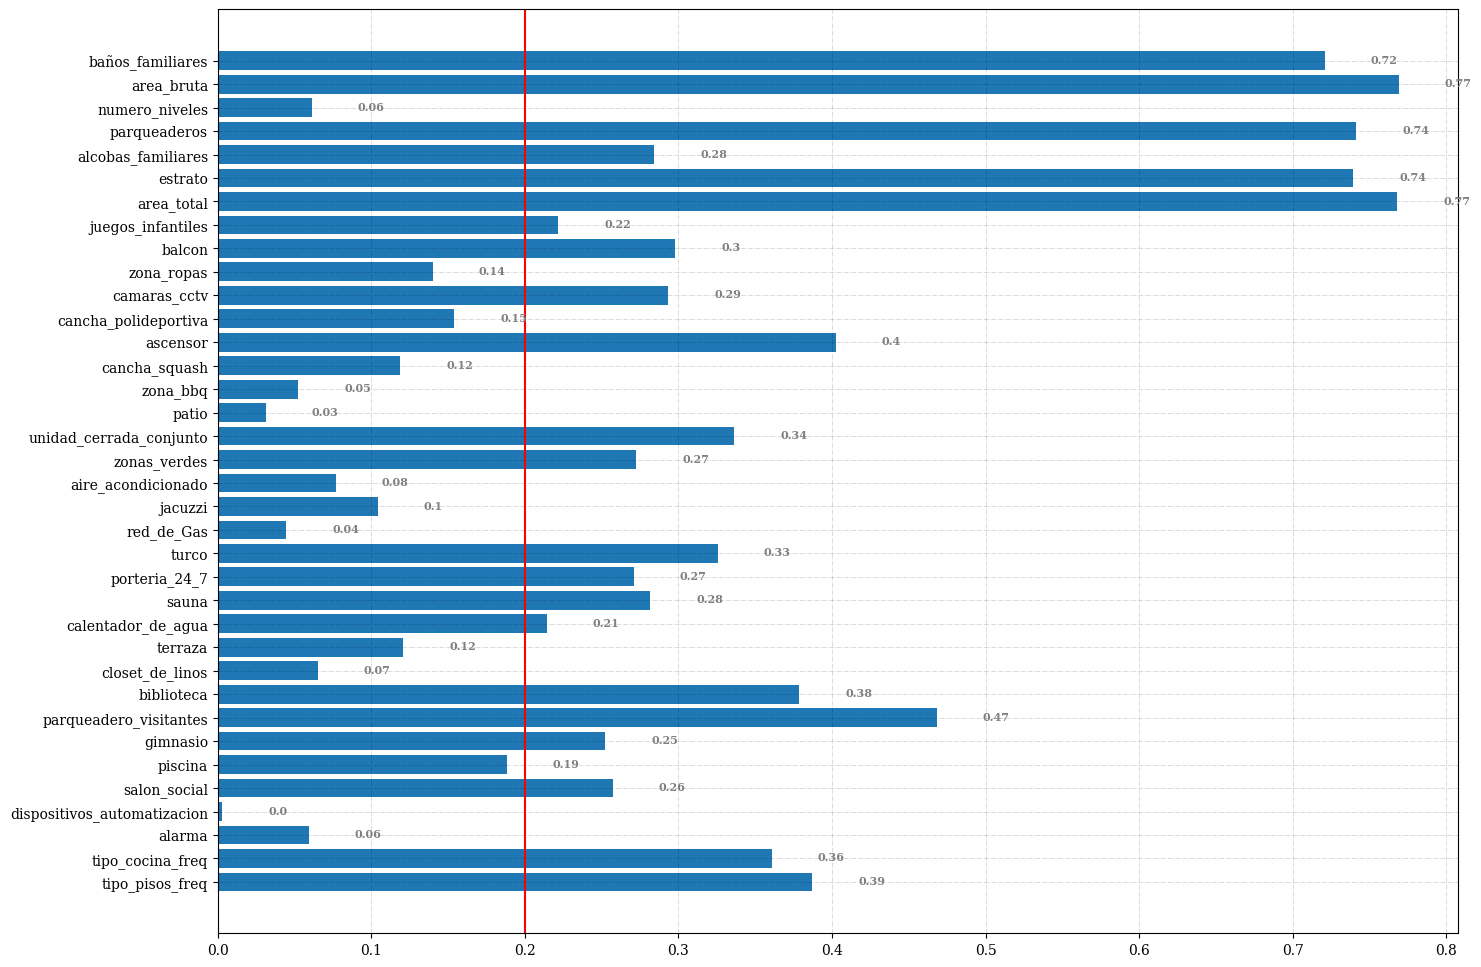

In [17]:
correlacion_vs_objetivo(X_est, Y)

EL gráfico anterior obtenemos que las variables que no influyen, según la correlación con la variable objetivo son:
- numero_niveles
- zona_ropas
- camaras_cctv
- cancha_polideportiva
- cancha_squash
- zona_bbq
- patio
- aire_acondicionado
- jacuzzi
- red_de_gas
- terraza
- closet_de_linos
- piscina
- dispositivos_automatizacion
- alarma

In [18]:
# Variables a descartar por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "zona_ropas",
    "camaras_cctv",
    "cancha_polideportiva",
    "cancha_squash",
    "zona_bbq",
    "patio",
    "aire_acondicionado",
    "jacuzzi",
    "red_de_Gas",
    "terraza",
    "closet_de_linos",
    "piscina",
    "dispositivos_automatizacion",
    "alarma",
]

calculando de nuevo la distribución para estas variables obtenemos

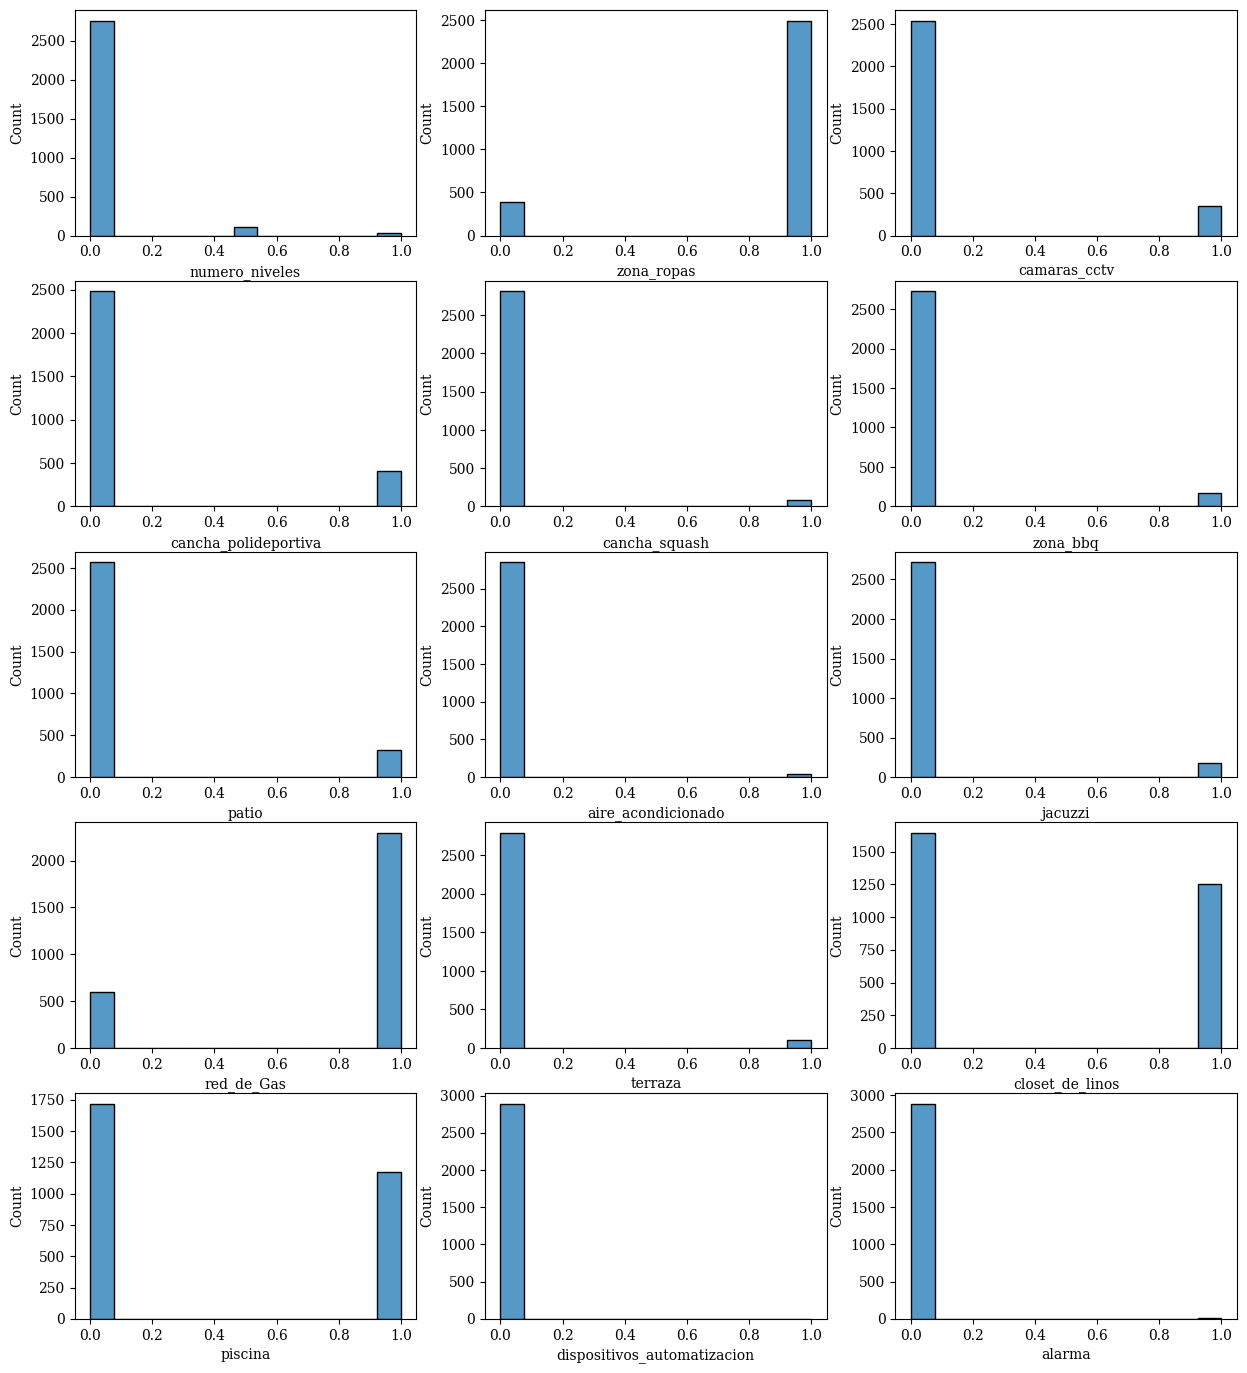

In [19]:
graficar_distribcion_vv(X_est, columns_disc_corr, fig_zise=(15,17) ,num_rows=5, num_cols=3)

Se observa todas son variables con una categoría predominante, por tanto, con este análisis, correlaciones y criterio del desarrollador las variables a descartar son:

In [20]:
# Variables a descartar por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "zona_ropas",
    "camaras_cctv",
    "cancha_polideportiva",
    "cancha_squash",
    "zona_bbq",
    "patio",
    "aire_acondicionado",
    "jacuzzi",
    "red_de_Gas",
    "terraza",
    "dispositivos_automatizacion",
    "alarma",
]

Se conservan las variables _zona_ropas_, _piscina_ y _closet_linos_

**Correlación entre variables predictoras**

Se procede a calcular el valor de la correlacion entre los tipos de variables, numéricas, categóricas numéricas y categóricas, dando como un valor 0.7 como límite para determinar si dos variables están altamente correlacionadas

**Correlación entre variables numéricas**

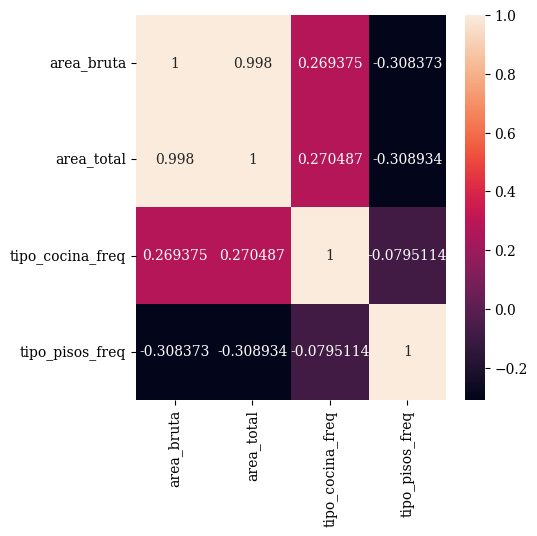

In [21]:
correlacion_tipo_variable(X_est, num_features)

Variables altamente correlacionadas:

- area_total - area_bruta: Variables que presentan un alto valor de correlación. Viendo desde el punto de vista del significado de las variables el área total y el área de una vivienda expresan una similitud muy grande e innecesaria para el modelo, por tanto se elige conservar solo la variable area_bruta

In [22]:
# Adicionar la variable area_bruta a lista de descartables
columns_disc_corr.append("area_total")

**Correlación Numéricas Categóricas**

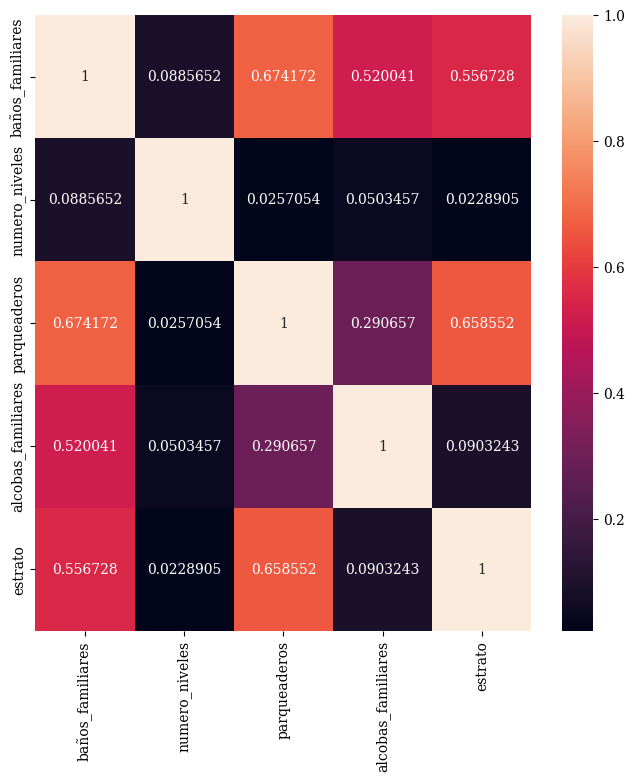

In [23]:
correlacion_tipo_variable(X_est, cat_number_fetures, figsize=(8,8))

Para este tipo de variables no se obtiene un valor que indique una correlación alta

**Correlación Categoricas**

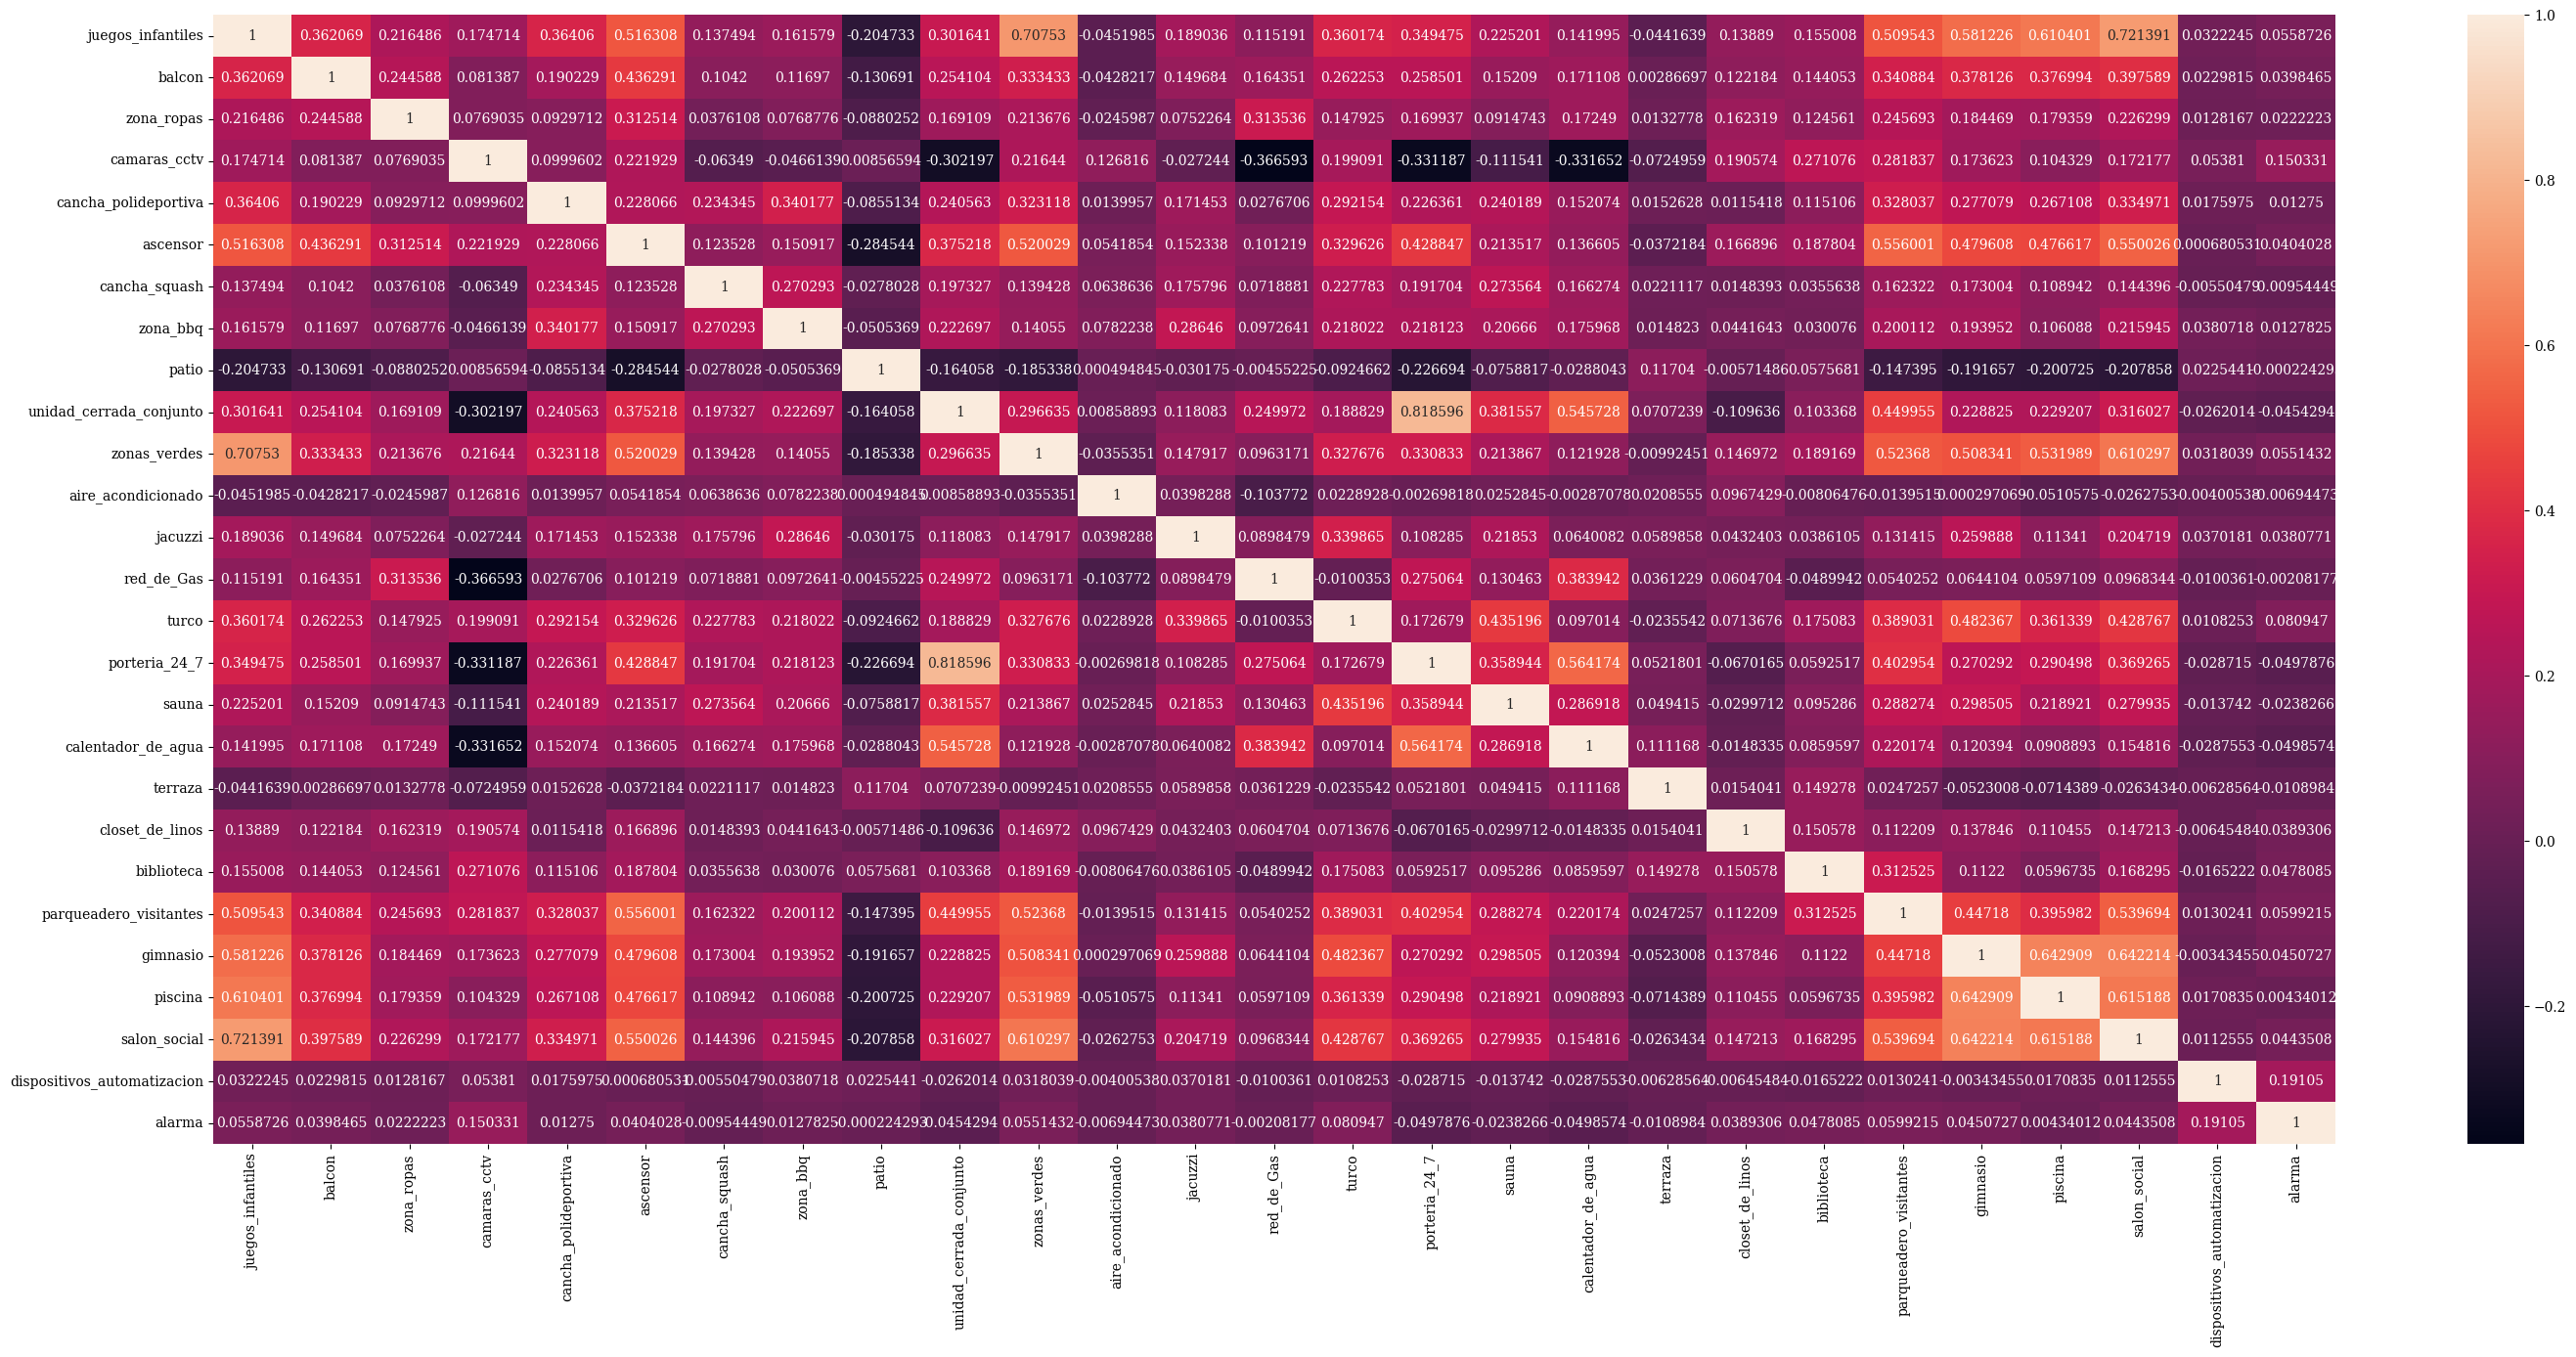

In [24]:
correlacion_tipo_variable(X_est, cat_features, figsize=(35,15))

Para el tipo de variables categóricas se encuentra un alto valor de correlacion entre:
- zonas_verdes - juegos_infantiles
- juegos_infantiles - salon social
- unidad_cerrada_conjunto - porteria_24_7

Para el descarte de una de estas variables se usará el siguiente criterio "La existencia de una variable implica necesariamente la otra?":
- La existencia de zonas verdes no es condición suficiente para la existencia de juegos infantiles, por tanto, se conservan ambas variables
- La existencia de juegos infantiles no es condición suficiente para la existencia de salon social, por tanto, se conservan ambas variables
- Un conjunto de unidad cerrada es, en la mayoria de los casos, implica la existencia de porteria 24/7, por tanto es una variable de la cual se puede prescindir

In [25]:
# Adicionar la variable porteria_24_7 a lista de descartables
columns_disc_corr.append("porteria_24_7")

**Correlación entre todas las variables:**

Para cerrar el análisis por correlaciones se ejecuta un todos vs todos para observar dependencia entre variables de diferente tipo

In [26]:
# Se imprimen solo las correlaciones iguales o superiores a 0.7
correlacion_completa(X_est)

baños_familiares vs area_bruta: 0.7896634979618757
baños_familiares vs area_total: 0.7874912256500718
area_bruta vs baños_familiares: 0.7896634979618757
area_bruta vs area_total: 0.9979998884384141
area_total vs baños_familiares: 0.7874912256500719
area_total vs area_bruta: 0.9979998884384141
juegos_infantiles vs zonas_verdes: 0.7075299603956473
juegos_infantiles vs salon_social: 0.7213913997957548
unidad_cerrada_conjunto vs porteria_24_7: 0.81859612609744
zonas_verdes vs juegos_infantiles: 0.7075299603956473
porteria_24_7 vs unidad_cerrada_conjunto: 0.81859612609744
salon_social vs juegos_infantiles: 0.721391399795755


De las correlaciones anteriormente analizadas solo hay una nueva, la cual es baños_familiates vs área bruta. Se podría determinar que es lógico que a mayo área existan mas baños, sin embargo, se decide conservar esta correlación y eliminar una de estas cuando se realice un analisis de importancia de variables en una iteración posterior

**Modelo**

Se eliminan las variables de la base de modelado dado los anteriores análisis

In [27]:
x_model = X_est.drop(columns = columns_disc_corr)
y_model = Y.copy()
imprimir_dimensiones(x_model)

Numero de muestras: 2892, Número de columnas: 21


**Dvisión de los datos:** Entrenamiento 75%, Test 25%

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (2169, 21)
Tamaño de los Datos de Validación =  (723, 21)
Tamaño del Vector de Clases de Entrenamiento =  (2169,)
Tamaño del Vector de Clases de Prueba =  (723,)


**Modelo línea base**

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Métricas**

In [30]:
predicciones = lr.predict(x_test)

rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred  = predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)

print(f"El error RMSE  de test es: {rmse}")
print(f"El error R2    de test es: {r2}")
print(f"El error MAPE    de test es: {mape}")

El error RMSE  de test es: 1116690.71698872
El error R2    de test es: 0.7077598493586875
El error MAPE    de test es: 0.2873220054503453


Conclusiones:
- Se realiza una limpieza de datos acorde a la lógica, definición y contenido de las variables, lo cual le mejora la integridad de los datos
- El analisis de correlación y distribución permitio omitir varias variables con lo cual facilita la mantenibilidad y entendimiento de los datos
- La mejoras en las métricas del modelo fueron mínimas lo cual da paso a, apartir de los datos obtenidos con este tratamiento hacer ejecución de nuevos algoritmos

Se crea una nueva base de datos partiendo de la eliminación de valores ilógicos ejecutado en esta iteración, estos datos seran usados en los procesos posteriores a no ser que realice una nueva intervención en la base de modelado

In [31]:
data_model_no_out.to_csv("datos_iteracion_2.csv", index=False)